#**Problem Statement**
The ISIC dataset is a large collection of skin lesion images that can be used to train a convolutional neural network (CNN) to classify skin lesions as benign or malignant. The problem statement of using the ISIC dataset to train a CNN for skin cancer classification would involve several steps such as:

**Data acquisition and pre-processing**: Acquiring the ISIC dataset and preparing the data for model training. This includes splitting the images into training, validation, and test sets, resizing and normalizing the images, and converting the labels to a format that can be used for training.

**Model design and architecture**: Designing the CNN architecture to best suit the task of skin lesion classification. This may involve using a pre-trained model as a base, and adding additional layers on top for the task of skin lesion classification.

**Model training**: Training the CNN on the prepared dataset using techniques such as early stopping and model checkpointing to prevent overfitting.

**Model evaluation**: Evaluating the trained model on the validation set


#**Connecting Google drive**

In [19]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


# **Importing Libaries**
The pandas library is used for data manipulation and analysis. It is commonly used to work with data stored in a table format, such as a CSV file. The line import pandas as pd imports the library and assigns it the alias "pd" for easy reference in the code.

The numpy library is used for numerical computing in Python. It is often used for working with arrays and matrices of data. It is imported twice in this script.

The pathlib library is used for working with file paths and directories.

The matplotlib library is used for data visualization. The pyplot module is imported for creating plots and charts.

The os library provides a way of using operating system dependent functionality like reading or writing to files.

The keras library is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It is used to create and train deep learning models. The script imports several modules from keras that are used for building and training a convolutional neural network (CNN) model, including Sequential, Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.

The Adam is an optimization algorithm for stochastic gradient descent.

The ImageDataGenerator is used for real-time data augmentation.




In [20]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

# **Importing Dataset**

In [21]:
# Define the path to the train and test images
train_path= pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
test_path  = pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [22]:
import os
from collections import defaultdict


# Create a dictionary to store the count of each label
label_counts = defaultdict(int)

# Iterate through the subdirectories in the train directory
for subdir in os.listdir(train_path):
    subdir_path = os.path.join(train_path, subdir)
    if os.path.isdir(subdir_path):
        # Iterate through the files in the subdirectory
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file)
            if os.path.isfile(file_path):
                # Check if the file is an image
                if file.endswith(('jpeg', 'jpg', 'png', 'gif', 'tiff')):
                    label_counts[subdir] += 1

# Print the label count for each class
for label, count in label_counts.items():
    print(f"Folder {label}: {count} images")


Folder basal cell carcinoma: 376 images
Folder seborrheic keratosis: 77 images
Folder actinic keratosis: 114 images
Folder nevus: 357 images
Folder pigmented benign keratosis: 462 images
Folder dermatofibroma: 95 images
Folder vascular lesion: 147 images
Folder squamous cell carcinoma: 181 images
Folder melanoma: 454 images


# **Imbalance Dataset Problem** 

This dataset consists of several classes of skin lesion images, including basal cell carcinoma, seborrheic keratosis, actinic keratosis, nevus, pigmented benign keratosis, dermatofibroma, vascular lesion, squamous cell carcinoma, and melanoma. Each class is represented by a certain number of images, as specified in the dataset class value.

The imbalance in the data refers to the fact that the number of images for each class is not the same. For example, the class "basal cell carcinoma" has 376 images, while the class "seborrheic keratosis" has only 77 images. This can cause problems when training a machine learning model, as the model may become biased towards the classes with more data and not perform well on the classes with less data.

Imbalance in the dataset can be handled by various methods, such as oversampling,undersampling, and data augmentation.

In [23]:
# Create a data generator for the train and validation data
datagen = ImageDataGenerator(rescale=1./255)

# Define the generator for the train and validation data
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    test_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical')

Found 2263 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


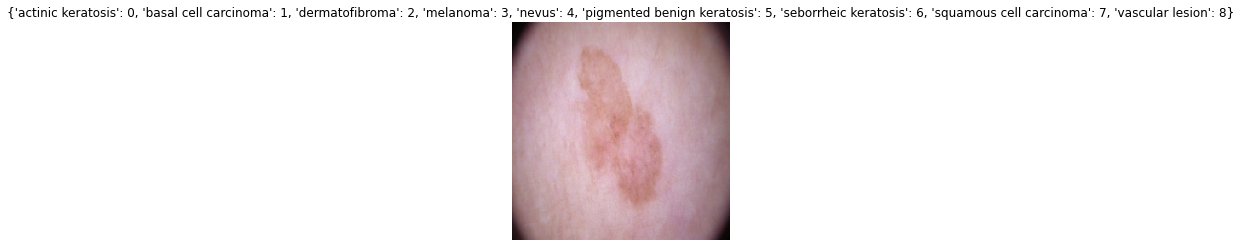

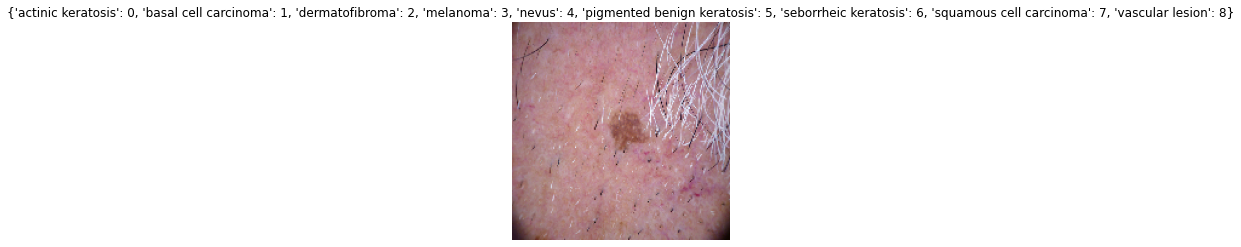

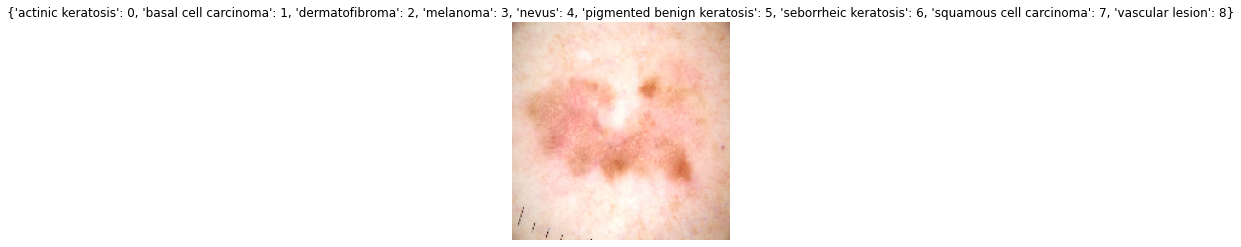

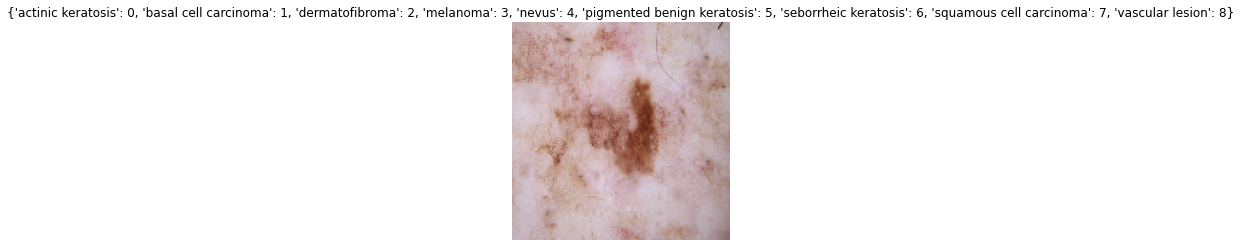

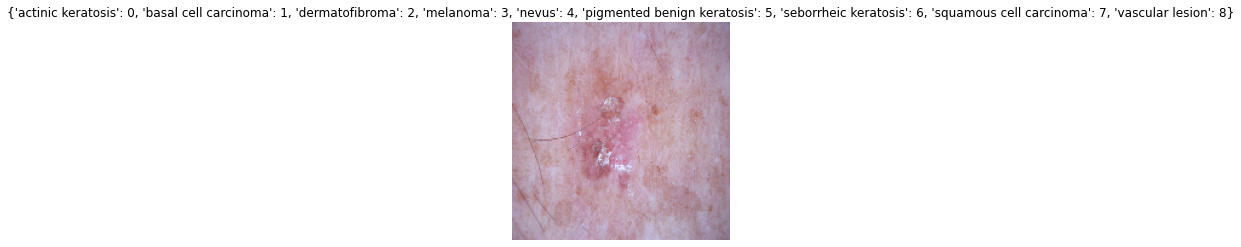

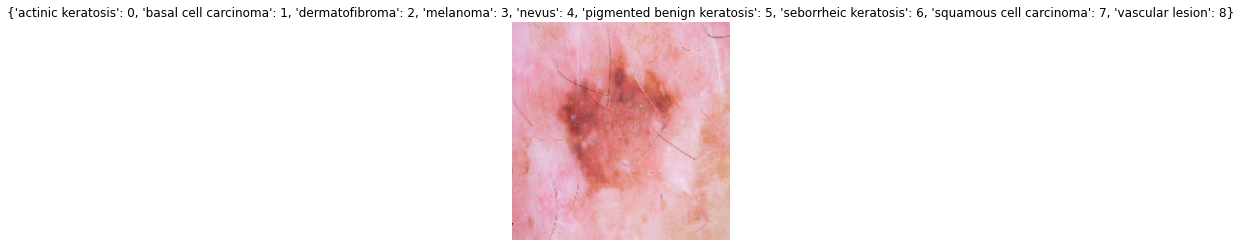

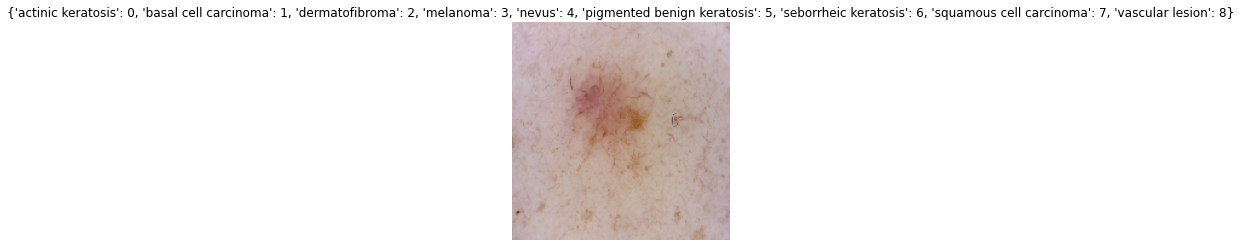

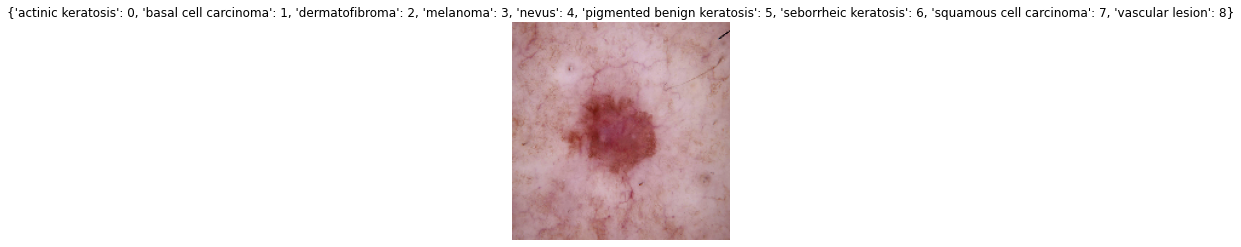

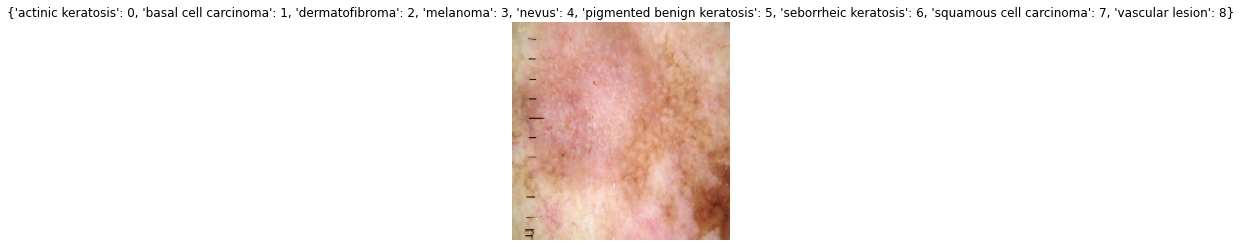

In [24]:
#Visualize one instance of each class in the train data
for i in range(9):
    plt.figure()
    plt.imshow(train_generator[i][0][0])
    plt.title(train_generator.class_indices)
    plt.axis('off')
    plt.show()


#**Creating Simple CNN Model with 20 Epochs**

In [28]:
# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator.filenames) // 32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // 32)


<ipython-input-28-9e2f3a370961>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
70/70 [==============================] - 190s 3s/step - loss: 2.0453 - accuracy: 0.2250 - val_loss: 2.3140 - val_accuracy: 0.1667
Epoch 2/20
70/70 [==============================] - 183s 3s/step - loss: 1.8602 - accuracy: 0.3115 - val_loss: 2.0535 - val_accuracy: 0.2917
Epoch 3/20
70/70 [==============================] - 183s 3s/step - loss: 1.7059 - accuracy: 0.3868 - val_loss: 2.1316 - val_accuracy: 0.3229
Epoch 4/20
70/70 [==============================] - 183s 3s/step - loss: 1.6054 - accuracy: 0.4276 - val_loss: 2.3927 - val_accuracy: 0.3438
Epoch 5/20
70/70 [==============================] - 184s 3s/step - loss: 1.5240 - accuracy: 0.4724 - val_loss: 2.2539 - val_accuracy: 0.2917
Epoch 6/20
70/70 [==============================] - 184s 3s/step - loss: 1.4520 - accuracy: 0.5043 - val_loss: 2.4127 - val_accuracy: 0.2917
Epoch 7/20
70/70 [==============================] - 184s 3s/step - loss: 1.4665 - accuracy: 0.4801 - val_loss: 2.4544 - val_accuracy: 0.3646
Epoch 8/20
70

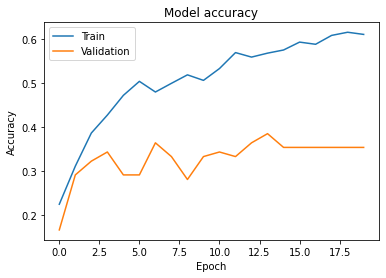

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Conclusion**

20 epochs is considered to be a relatively low number of training iterations for a deep learning model such as a CNN. In general, deep learning models require a large amount of data and a large number of training iterations in order to learn robust representations of the data.

Running a model for only 20 epochs may not be enough to fully train the model and allow it to converge to a good solution. This can lead to underfitting, where the model is not able to accurately capture the underlying patterns in the data. This may result in poor performance on the test set and the model may not generalize well to new unseen data.

Additionally, the number of epochs also depend on the complexity of the problem, the size of the dataset, the performance of the optimization algorithm, and the quality of the features. If the problem is hard, the data is large and features are noisy, more epochs may be necessary for the model to converge to a good solution.

In conclusion, running a model for only 20 epochs may not be enough to fully train the model and achieve good performance on the ISIC skin cancer dataset classification problem. More epochs may be necessary in order to allow the model to converge to a good solution and achieve good performance on the test set.

#**Data Augmentation**

Data augmentation is a technique used to artificially increase the size of a dataset by creating modified versions of existing data. This can be useful in situations where there is a limited amount of data available for training a machine learning model.

By applying various data augmentation techniques, such as rotation, scaling, flipping, cropping, and adding noise, new and different versions of the original data are created, which can be used to train the model. This can help to prevent overfitting, which is when a model performs well on the training data but not on new, unseen data.

Additionally, data augmentation can also help to balance out imbalanced datasets by creating new samples for under-represented classes. This can help to improve the performance of a machine learning model by ensuring that it is not biased towards certain classes.

Overall, data augmentation is an important technique used to improve the performance of machine learning models and can be very useful in various situations, especially when the amount of data is limited.


In [30]:

# Create a data generator for the train data
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5])

# Define the generator for the train data
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical')
validation_generator = datagen.flow_from_directory(
    test_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical')

Found 2263 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


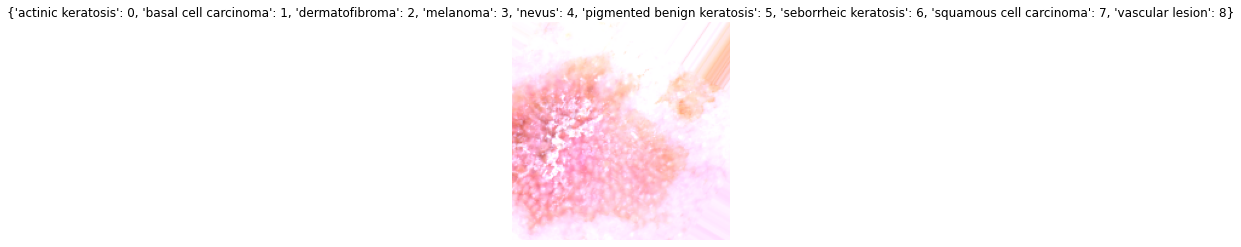

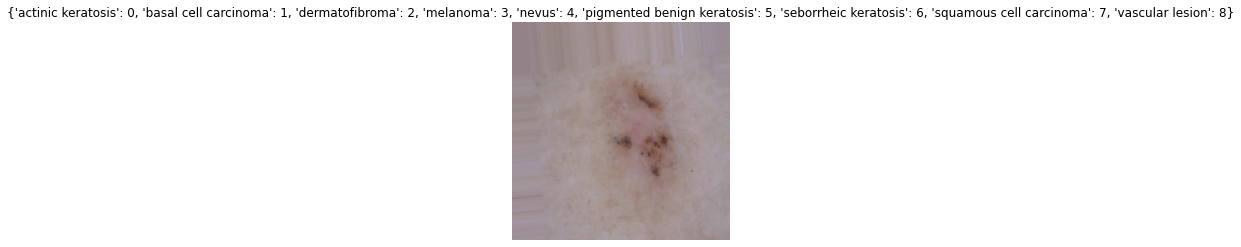

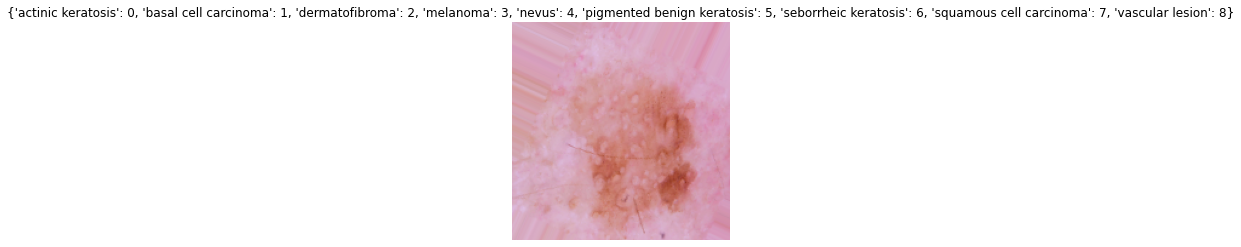

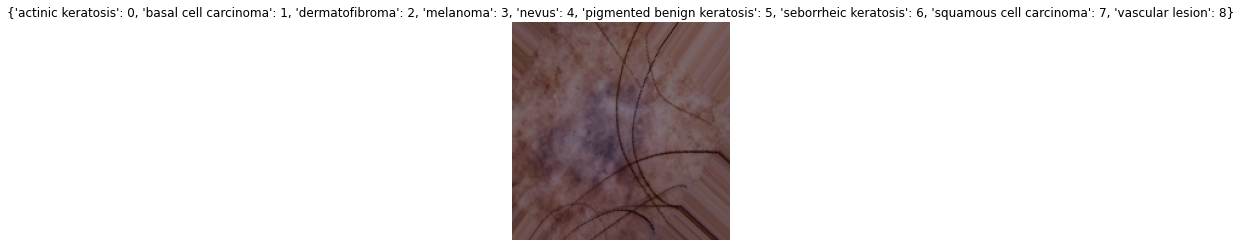

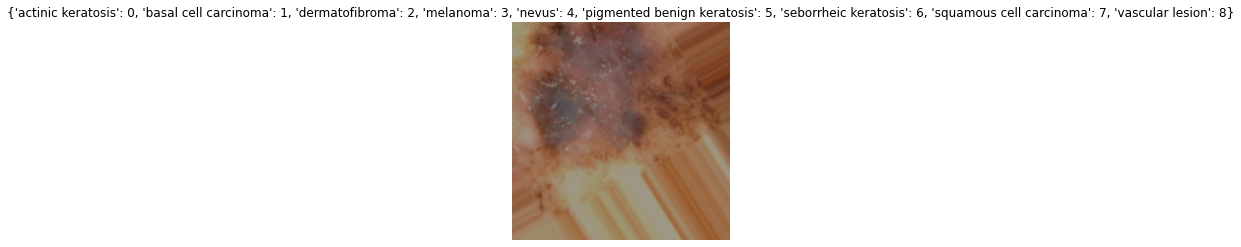

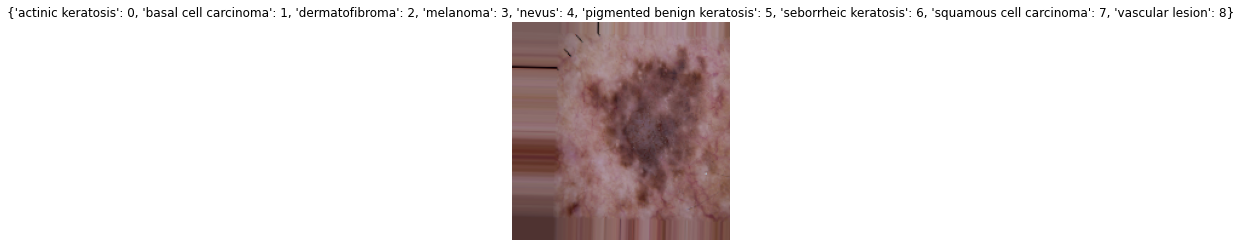

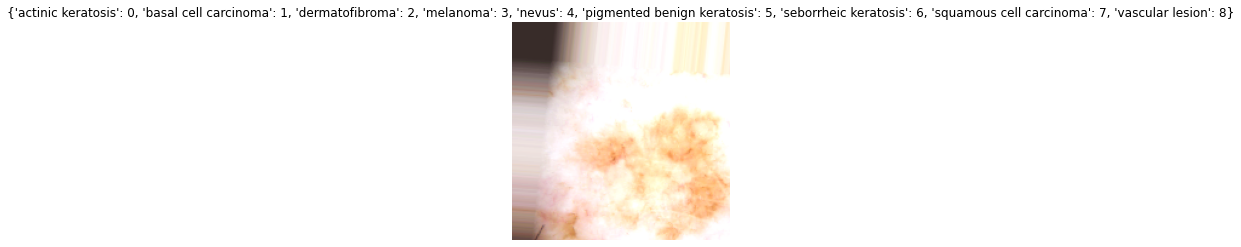

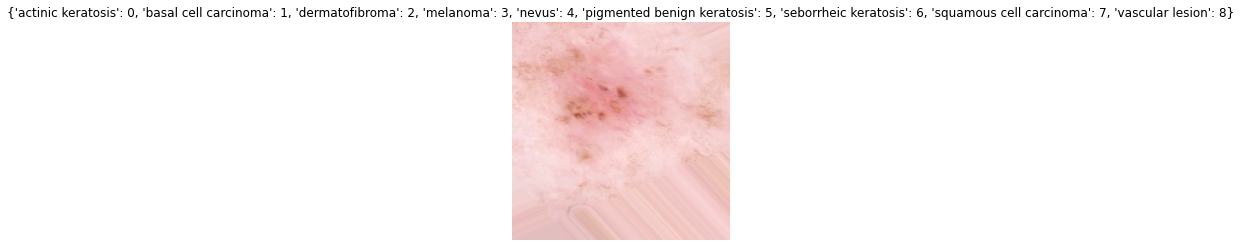

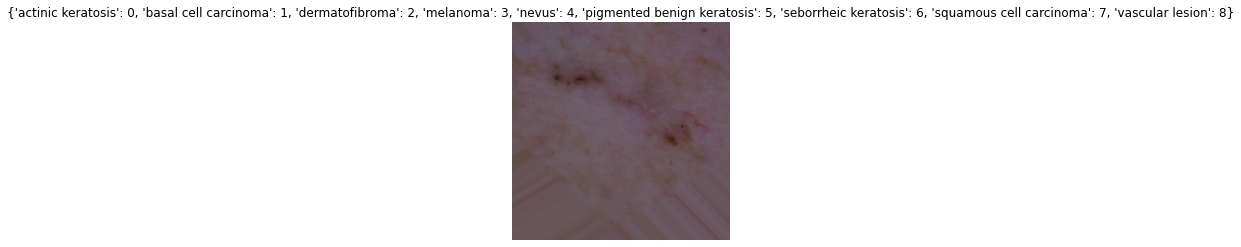

In [21]:
#Visualize one instance of each class in the train data
for i in range(9):
    plt.figure()
    plt.imshow(train_generator[i][0][0])
    plt.title(train_generator.class_indices)
    plt.axis('off')
    plt.show()

# **Model Training on Augmented data with 30 Epochs**

In [31]:
# Create a CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator.filenames) // 32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // 32)

<ipython-input-31-2c81769f529e>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
70/70 [==============================] - 215s 3s/step - loss: 2.0099 - accuracy: 0.2559 - val_loss: 2.1822 - val_accuracy: 0.2292
Epoch 2/30
70/70 [==============================] - 202s 3s/step - loss: 1.8714 - accuracy: 0.3093 - val_loss: 2.2503 - val_accuracy: 0.1771
Epoch 3/30
70/70 [==============================] - 200s 3s/step - loss: 1.7835 - accuracy: 0.3537 - val_loss: 2.1581 - val_accuracy: 0.2604
Epoch 4/30
70/70 [==============================] - 200s 3s/step - loss: 1.7710 - accuracy: 0.3469 - val_loss: 2.3061 - val_accuracy: 0.3125
Epoch 5/30
70/70 [==============================] - 198s 3s/step - loss: 1.6935 - accuracy: 0.3864 - val_loss: 2.9712 - val_accuracy: 0.1875
Epoch 6/30
70/70 [==============================] - 198s 3s/step - loss: 1.7280 - accuracy: 0.3702 - val_loss: 2.2256 - val_accuracy: 0.2292
Epoch 7/30
70/70 [==============================] - 201s 3s/step - loss: 1.6302 - accuracy: 0.4119 - val_loss: 2.2071 - val_accuracy: 0.2396
Epoch 8/30
70

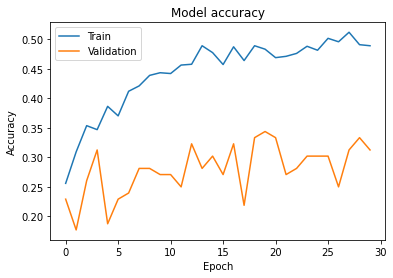

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# *Conclusion*

We obtain that even in 30 epochs using the same CNN model. we didnt obtain the big changes on the model performance.

# **Model Training on Augmented data with 20 Epochs**

In [22]:
# Create the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the data for the dense layers
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(9, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator.filenames) // 32,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // 32)

<ipython-input-22-e766b29ea27e>:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/20
70/70 [==============================] - 205s 3s/step - loss: 2.0290 - accuracy: 0.2246 - val_loss: 2.3098 - val_accuracy: 0.1562
Epoch 2/20
70/70 [==============================] - 202s 3s/step - loss: 1.8139 - accuracy: 0.3487 - val_loss: 2.0997 - val_accuracy: 0.1979
Epoch 3/20
70/70 [==============================] - 201s 3s/step - loss: 1.6804 - accuracy: 0.3926 - val_loss: 2.1893 - val_accuracy: 0.2500
Epoch 4/20
70/70 [==============================] - 200s 3s/step - loss: 1.6207 - accuracy: 0.4097 - val_loss: 1.9725 - val_accuracy: 0.2708
Epoch 5/20
70/70 [==============================] - 200s 3s/step - loss: 1.5840 - accuracy: 0.4343 - val_loss: 1.9982 - val_accuracy: 0.3125
Epoch 6/20
70/70 [==============================] - 201s 3s/step - loss: 1.5245 - accuracy: 0.4603 - val_loss: 2.1546 - val_accuracy: 0.2708
Epoch 7/20
70/70 [==============================] - 199s 3s/step - loss: 1.4947 - accuracy: 0.4756 - val_loss: 2.0433 - val_accuracy: 0.2500
Epoch 8/20
70

#*Final Conclusion*

There is issue of data imbalance. So without dealing with imbalance data issue if we build the simple CNN than there is low validation accuracy. When we agument the dataset we add the additional class and make dataset more balance. So by using this we saw that we improve the model accuray. Another issue We observe that there is issue of epoch.We have used very small number of epoch. We saw that if we increass the epoch we can improve the accuracy of model. So if we train our model for 100-150 epoches there are chances to improve the model performance. As we saw in the final model even with 20 epochs we have obtain the better accuray on training and validation compare to 1st and 2nd model. I final model we have change the model architcure. SO if we want to obtain the high accuracy we can used soem pretrain model or we have to train the data for the longer time.